## Decision Tree

In [1]:
# Load libraries
import pandas as pd
import boto3
import os
import io
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv('diabetesdatasample.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram


split dataset in features and target variable

In [5]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

Split dataset into training set and test set

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy -

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7316017316017316


## Cost complexity pruning

In [9]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
print(ccp_alphas)

[0.         0.00372439 0.00372439 0.00436985 0.0043734  0.00493454
 0.00509047 0.00513014 0.00558099 0.00566806 0.00604304 0.00624114
 0.00654872 0.00657883 0.00694216 0.00695594 0.00707654 0.00730225
 0.00738036 0.00738644 0.00778042 0.0077882  0.00809779 0.00817572
 0.00831358 0.00892065 0.00895534 0.00899804 0.0092473  0.00927091
 0.00968682 0.01001774 0.01026029 0.01084444 0.01092892 0.01114364
 0.01183298 0.01185755 0.01236511 0.01344722 0.01371463 0.01416571
 0.02140482 0.02197292 0.02908631 0.03427769 0.04079143 0.11263947]


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

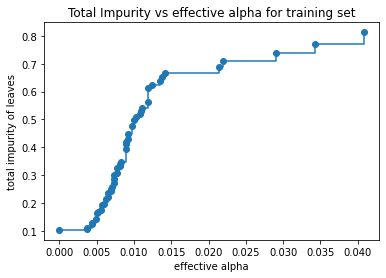

In [11]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11263947161350873


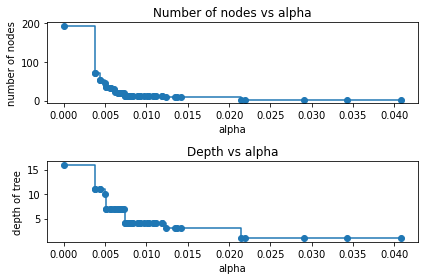

In [13]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

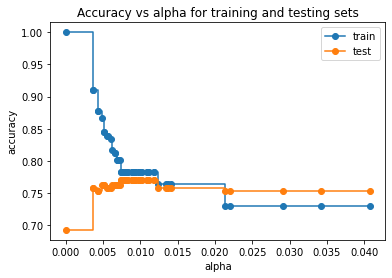

In [14]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

setting ccp_alpha=0.01 maximizes the testing accuracy.

### Use GridSearchCV to find the best alpha

In [15]:
ccp_alphas = clf.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

In [16]:
ccp_alphas

array([0.        , 0.00155183, 0.00159617, 0.00159617, 0.00168485,
       0.00170701, 0.00173805, 0.00176419, 0.00184173, 0.00220705,
       0.00235343, 0.00239425, 0.00239603, 0.00248293, 0.00270865,
       0.0027933 , 0.0027933 , 0.0027933 , 0.00288729, 0.00291802,
       0.00299761, 0.00304159, 0.00319234, 0.00328623, 0.00331057,
       0.00331057, 0.00338581, 0.00341403, 0.00351955, 0.00357208,
       0.00377917, 0.00394348, 0.00416478, 0.00453757, 0.00481538,
       0.00500617, 0.00502699, 0.00537657, 0.00570325, 0.00583738,
       0.00611563, 0.0061912 , 0.00643788, 0.00682078, 0.00732064,
       0.01112616, 0.01216636, 0.01433312, 0.0154276 , 0.02118767,
       0.07069409])

In [17]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report

In [18]:
ccp_alpha_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(),
                                     scoring=make_scorer(accuracy_score),
                                     param_grid=ParameterGrid({"ccp_alpha": [[alpha] for alpha in ccp_alphas]}),)

In [19]:
ccp_alpha_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=<sklearn.model_selection._search.ParameterGrid object at 0x130d34128>,
             scoring=make_scorer(accuracy_score))

In [20]:
ccp_alpha_grid_search.best_params_

{'ccp_alpha': 0.007320643962116198}

In [21]:
best_ccp_alpha_tree=ccp_alpha_grid_search.best_estimator_

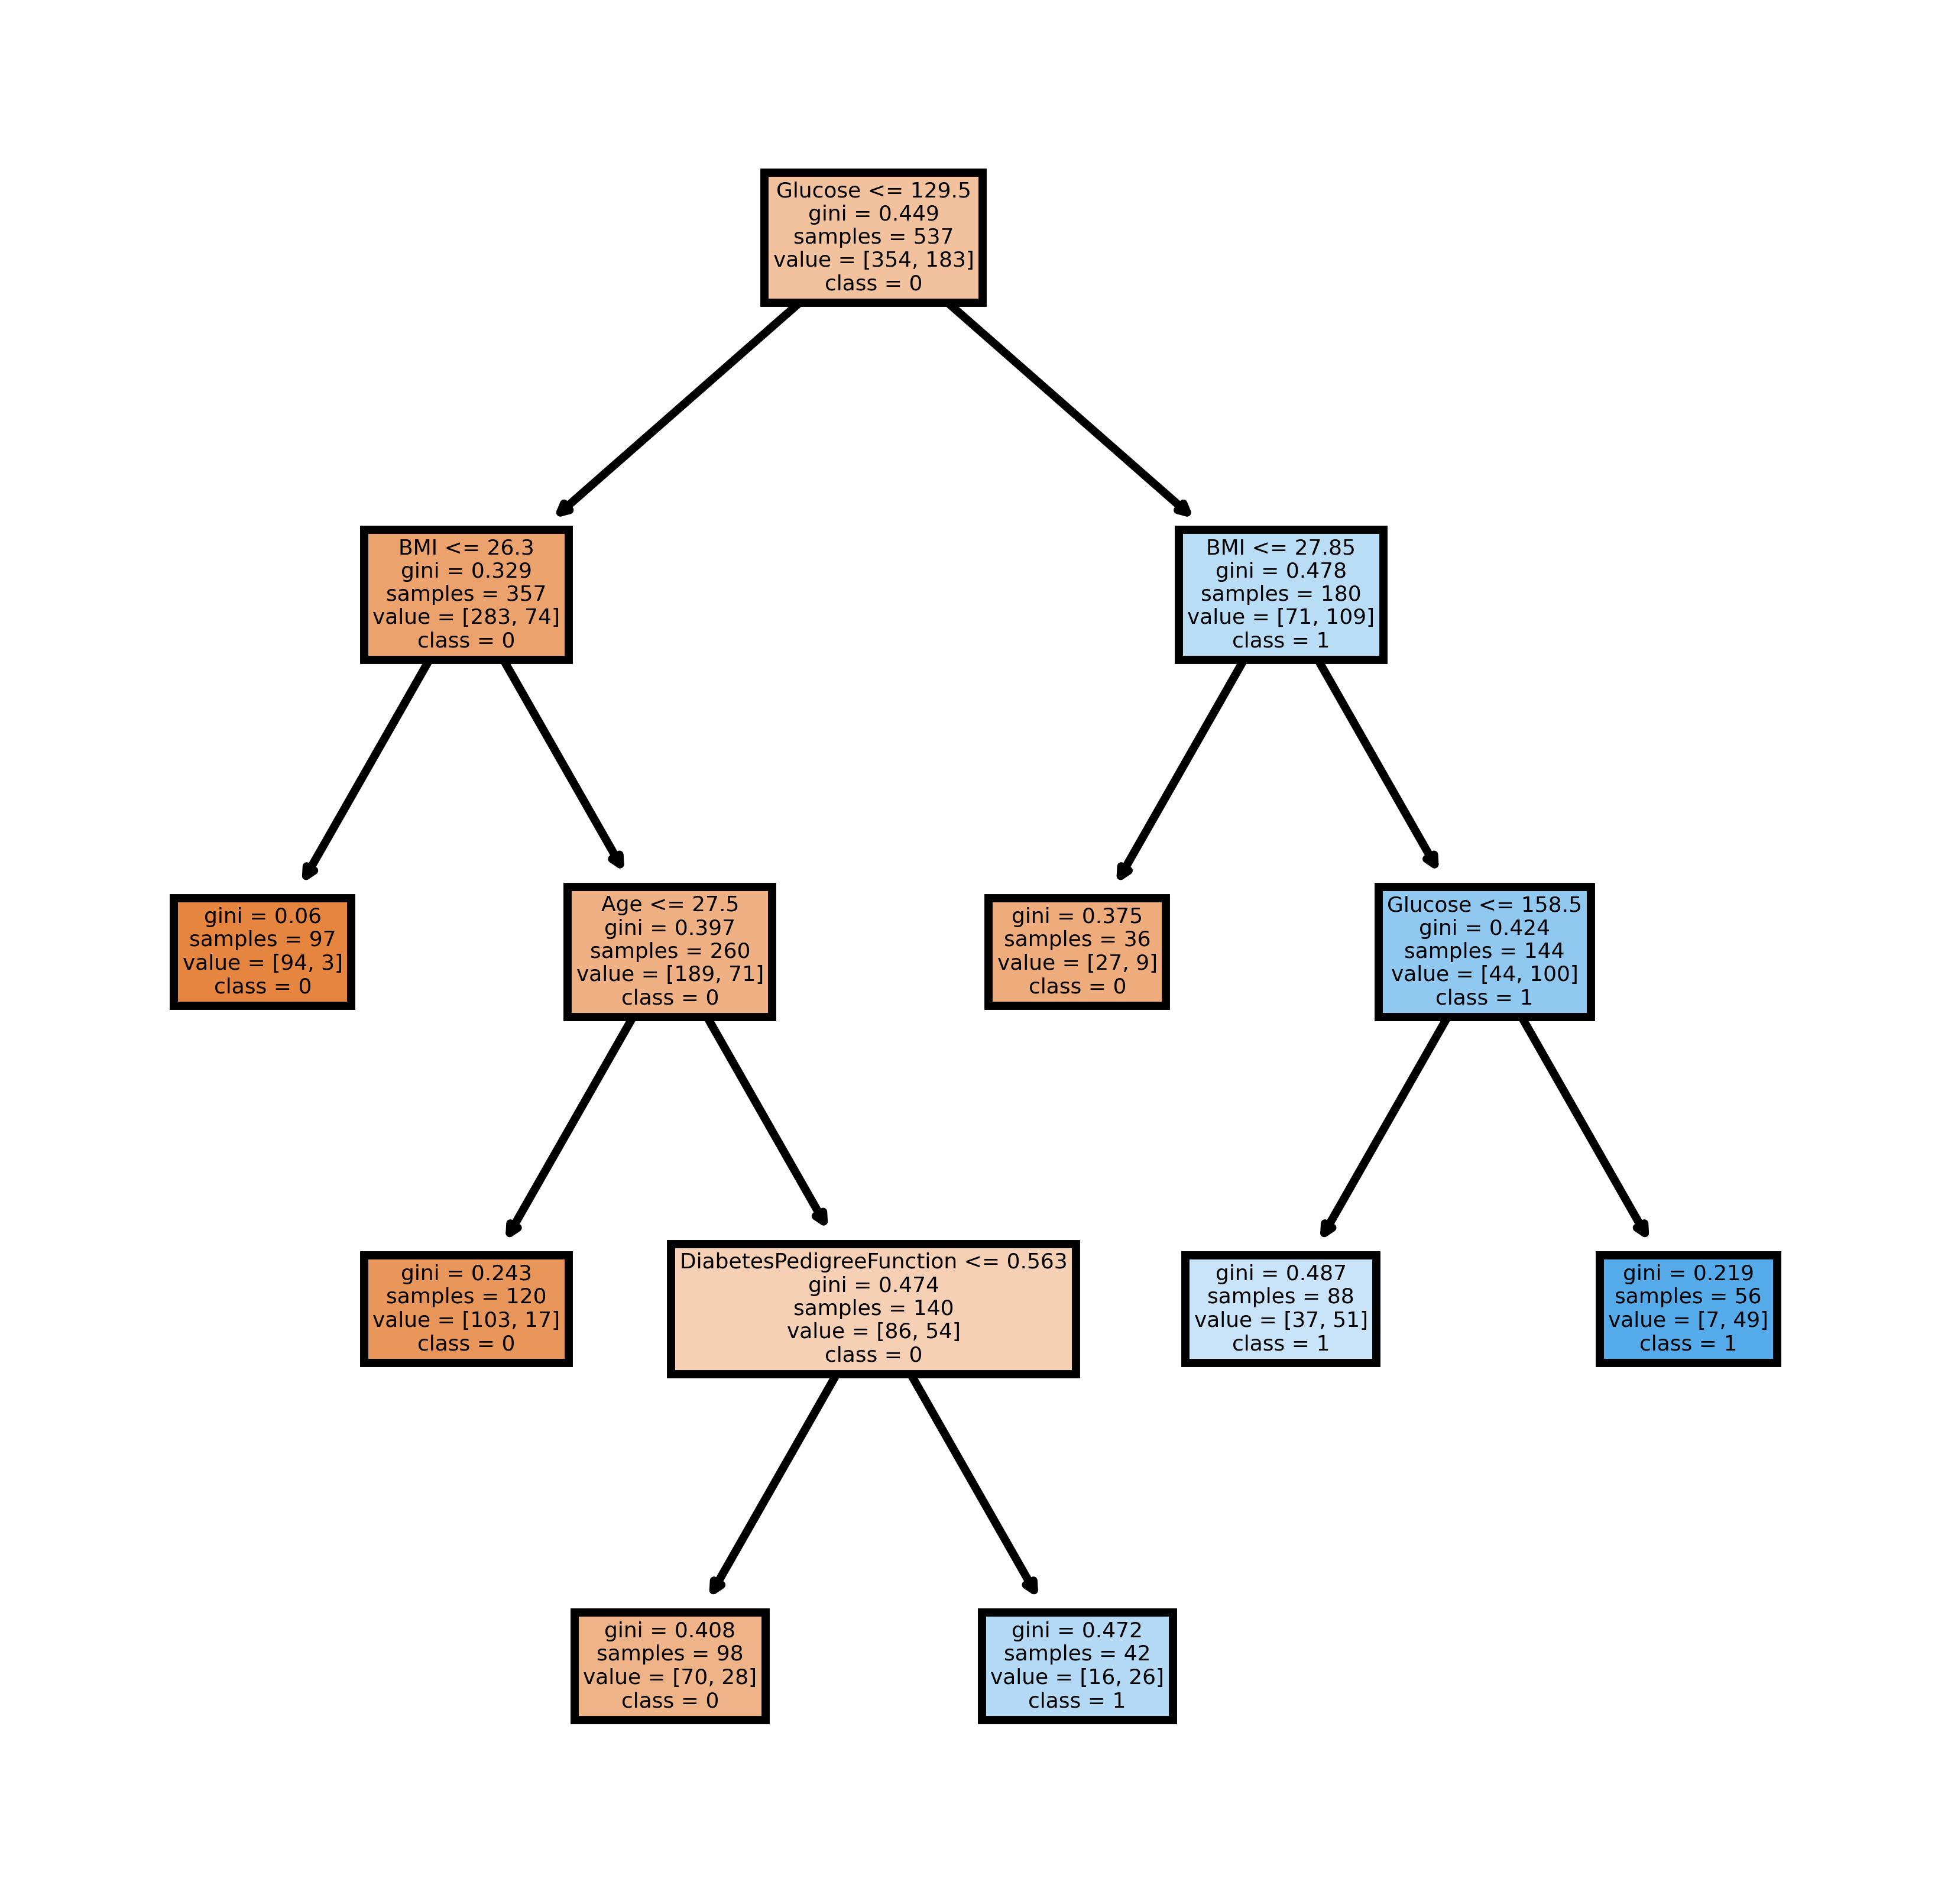

In [22]:
plt.figure(figsize=(4,4), dpi=1000)
plot_tree(best_ccp_alpha_tree,
         feature_names=feature_cols,
         class_names=['0', '1'],
         filled=True,)
plt.show()

In [23]:
# Train Decision Tree Classifier
best_ccp_alpha_tree = best_ccp_alpha_tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = best_ccp_alpha_tree.predict(X_test)

In [24]:
# Model Accuracy -

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.7705627705627706


increase the accuracy from 0.7359 to 0.7705